Resposta Impulsional de um Filtro passa-baixo

In [49]:
h =  [-0.00025604525581002235, 0.00013669139298144728, 0.0005385575350373983,
0.0008378280326724052, 0.000906112720258534, 0.0006353431381285191,
-9.884083502996931e-19, -0.0008822851814329624, -0.0017323142383247614,
-0.0021665366366505623, -0.0018335371278226376, -0.0005912294145673513,
0.001349081052467227, 0.0033936649560928345, 0.004703888203948736,
0.004488115198910236, 0.0023609865456819534, -0.0013707970501855016,
-0.00564080523326993, -0.008859002031385899, -0.009428252466022968,
-0.006394983734935522, 4.76480351940553e-18, 0.008114570751786232,
0.015200719237327576, 0.018197273835539818, 0.01482443418353796,
0.004636279307305813, -0.010356673039495945, -0.025791890919208527,
-0.03587324544787407, -0.034922562539577484, -0.019146423786878586,
0.011919975280761719, 0.05478153005242348, 0.10243935883045197,
0.1458890736103058, 0.1762896478176117, 0.18720689415931702,
0.1762896478176117, 0.1458890736103058, 0.10243935883045197,
0.05478153005242348, 0.011919975280761719, -0.019146423786878586,
-0.034922562539577484, -0.03587324544787407, -0.025791890919208527,
-0.010356673039495945, 0.004636279307305813, 0.01482443418353796,
0.018197273835539818, 0.015200719237327576, 0.008114570751786232,
4.76480351940553e-18, -0.006394983734935522, -0.009428252466022968,
-0.008859002031385899, -0.00564080523326993, -0.0013707970501855016,
0.0023609865456819534, 0.004488115198910236, 0.004703888203948736,
0.0033936649560928345, 0.001349081052467227, -0.0005912294145673513,
-0.0018335371278226376, -0.0021665366366505623, -0.0017323142383247614,
-0.0008822851814329624, -9.884083502996931e-19, 0.0006353431381285191,
0.000906112720258534, 0.0008378280326724052, 0.0005385575350373983,
0.00013669139298144728, -0.00025604525581002235]

C:\Users\estgl\AppData\Local\Temp\ipykernel_20324\401331165.py:10: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)


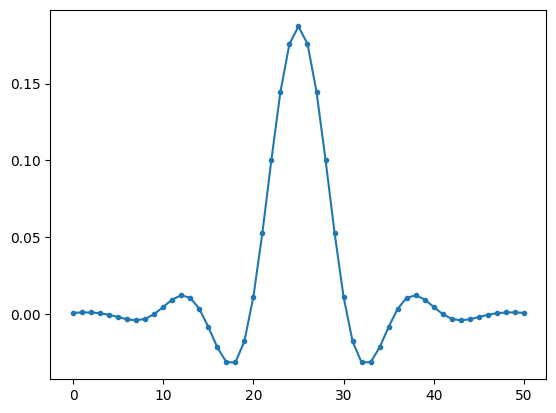

In [50]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

num_taps = 51
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

#Criar filtro passa-baixo
h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)

#Plot da resposta impulsional
plt.plot(h, '.-')
plt.show()

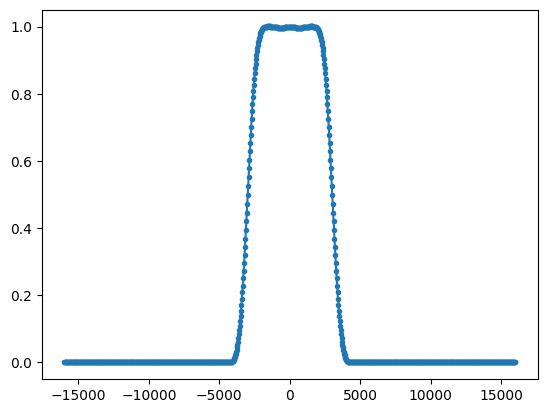

In [51]:
# Plot da resposta em frequência
H = np.abs(np.fft.fft(h, 1024))
H = np.fft.fftshift(H) # fazer 0Hz no centro
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))
plt.plot(w, H, '.-')
plt.show()

Filtro com taps complexas

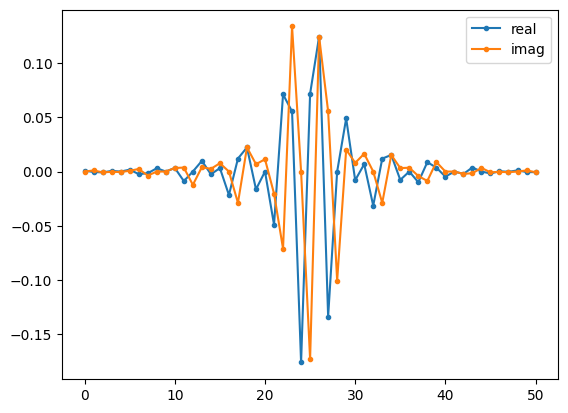

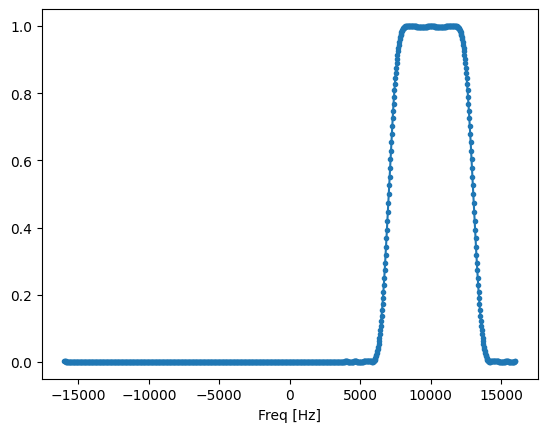

In [52]:
# Shift no filtro em frequencia multiplicando por exp(j*2*pi*f0*t)
f0 = 10e3 #Quantidade de shift aplicado
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # vetor tempo.( args são (start, stop, step))
exponential = np.exp(2j*np.pi*f0*t)

h_band_pass = h * exponential #Aplicamos o shift

#Plot da resposta impulsional
plt.figure('impulse')
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real','imag'], loc=1)

#plot da resposta em frequência
# Plot da resposta em frequência
H = np.abs(np.fft.fft(h_band_pass, 1024))
H = np.fft.fftshift(H) # fazer 0Hz no centro
w = np.linspace(-sample_rate/2, sample_rate/2, len(H))
plt.figure('freq')
plt.plot(w, H, '.-')
plt.xlabel('Freq [Hz]')
plt.show()

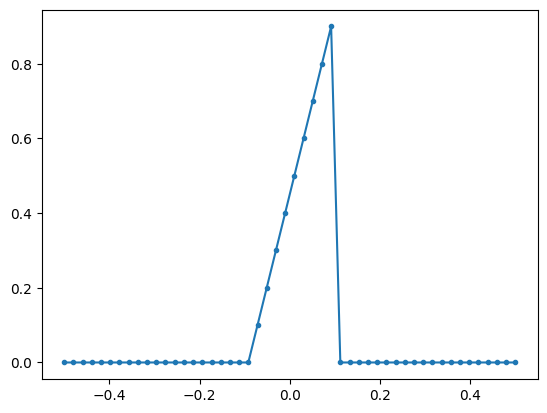

In [53]:
H = np.hstack((np.zeros(20), np.arange(10)/10, np.zeros(20)))
w = np.linspace(-0.5, 0.5, 50)
plt.plot(w, H, '.-')
plt.show()


Como obter os taps se apenas tivermos a resposta em frequencia

- Revertemos do dominio de frequencias para dominio de tempo.

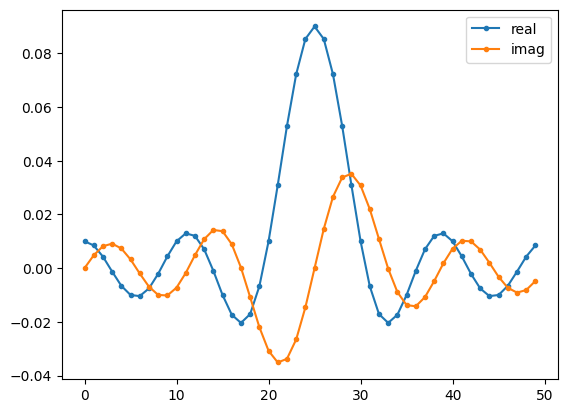

In [54]:
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))
plt.plot(np.real(h), '.-')
plt.plot(np.imag(h), '.-')
plt.legend(['real','imag'], loc=1)
plt.show()

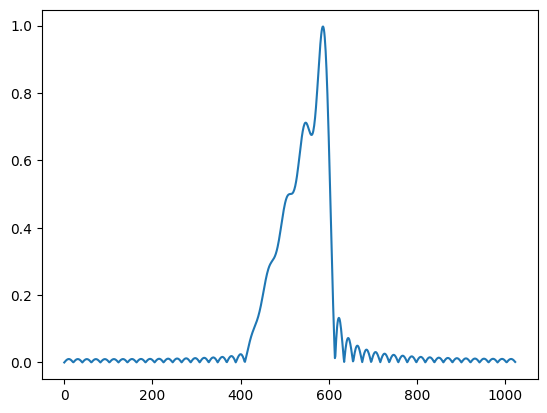

In [55]:
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()

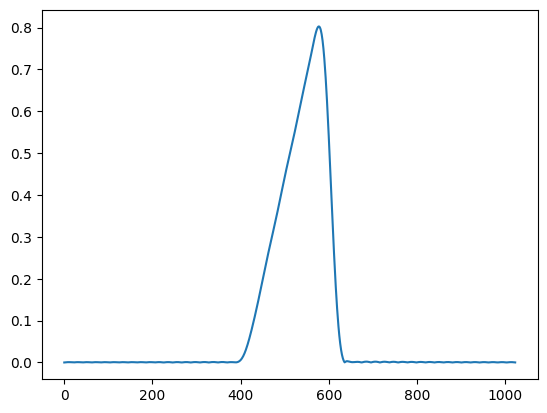

In [56]:
#Depois de criar h, vamos criar e aplicar a janela
window = np.hamming(len(h))
h = h * window

H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()


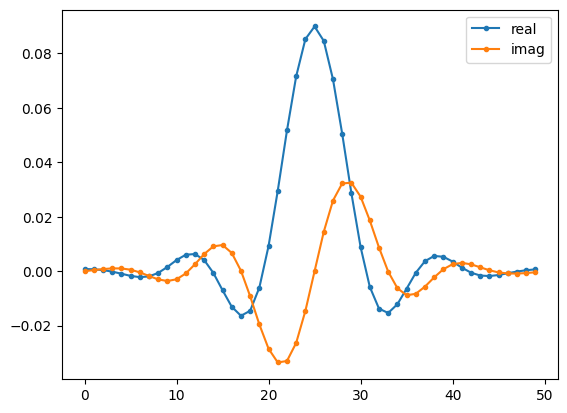

In [57]:

plt.plot(np.real(h), '.-')
plt.plot(np.imag(h), '.-')
plt.legend(['real','imag'], loc=1)
plt.show()

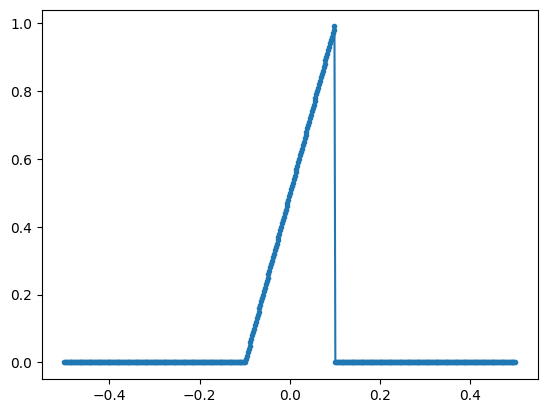

In [58]:
H = np.hstack((np.zeros(200), np.arange(100)/100, np.zeros(200)))
w = np.linspace(-0.5, 0.5, 500)
plt.plot(w, H, '.-')
plt.show()
# (the rest of the code is the same)


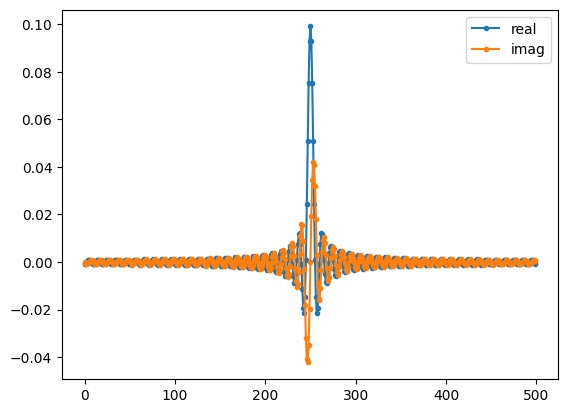

In [59]:
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))
plt.plot(np.real(h), '.-')
plt.plot(np.imag(h), '.-')
plt.legend(['real','imag'], loc=1)
plt.show()

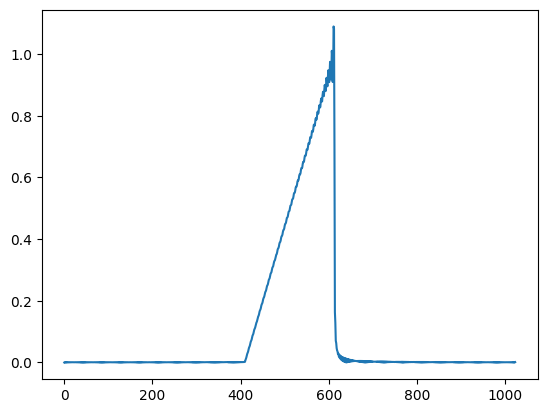

In [60]:
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()